<h1 align=center> Project<h1>

## Import the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Model section

In [2]:
# load the dataset
def load_data(path):
    data = pd.read_csv(path)
    return data

In [3]:
data = load_data("banking.csv")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
# EDA 
def EDA(df, bal_check=False):
    print(f'{70*"*"}')
    print(f'{20*"*"} -Checking the shape- {20*"*"}')
    print(f'{70*"*"}')
    print(df.shape)
    
    print(f'{70*"*"}')
    print(f'{20*"*"} -Describe the dataset- {20*"*"}')
    print(f'{70*"*"}')
    print(df.describe())
    
    print(f'{70*"*"}')
    print(f'{20*"*"} -Check datatype- {20*"*"}')
    print(f'{70*"*"}')
    print(df.info())
    
    print(f'{70*"*"}')
    print(f'{20*"*"} -Check for null values - {20*"*"}')
    print(f'{70*"*"}')
    print(df.isnull().sum())
    
    if bal_check:
        target = input("enter name of the target value: ")
        print(f'{70*"*"}')
        print(f'{20*"*"} -Check target balance - {20*"*"}')
        print(f'{70*"*"}')
        print(df[target].value_counts())

In [5]:
EDA(data, bal_check=True)

**********************************************************************
******************** -Checking the shape- ********************
**********************************************************************
(41188, 21)
**********************************************************************
******************** -Describe the dataset- ********************
**********************************************************************
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.0000

enter name of the target value:  y


**********************************************************************
******************** -Check target balance - ********************
**********************************************************************
0    36548
1     4640
Name: y, dtype: int64


In [7]:
def preprocessing(data):
    data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
    data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
    data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])
    
    cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
    for var in cat_vars:
        cat_list='var'+'_'+var
        cat_list = pd.get_dummies(data[var], prefix=var)
        data1=data.join(cat_list)
        data=data1

    cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
    data_vars=data.columns.values.tolist()
    to_keep=[i for i in data_vars if i not in cat_vars]
    
    final_data=data[to_keep]
    
    
    final_data.columns = final_data.columns.str.replace('.','_')
    final_data.columns = final_data.columns.str.replace(' ','_')
    return final_data

In [8]:
def train_test_split(final_data):
    from sklearn.model_selection import train_test_split
    X = final_data.loc[:, final_data.columns != 'y']
    y = final_data.loc[:, final_data.columns == 'y']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify = y, random_state=47)
    return X_train, X_test, y_train, y_test

In [9]:
def over_sampling_target_class(X_train, y_train):
    ### Over-sampling using SMOTE 
    from imblearn.over_sampling import SMOTE
    os = SMOTE(random_state=0)

    columns = X_train.columns
    os_data_X,os_data_y=os.fit_resample(X_train, y_train)

    os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
    os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
    # we can Check the numbers of our data
    print("length of oversampled data is ",len(os_data_X))
    print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
    print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
    print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
    print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))
    
    X_train = os_data_X
    y_train = os_data_y['y']
 
    return X_train, y_train

In [10]:
def training_basic_classifier(X_train,y_train):
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(n_estimators=101)
    model.fit(X_train, y_train)
    
    return model

In [11]:
def predict_on_test_data(model,X_test):
    y_pred = model.predict(X_test)
    return y_pred

In [12]:
def get_metrics(y_true, y_pred):
    from sklearn.metrics import accuracy_score,precision_score,recall_score
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return {'accuracy': round(acc, 2), 'precision': round(prec, 2), 'recall': round(recall, 2)}

In [13]:
def create_roc_auc_plot(clf, X_data, y_data):
    import matplotlib.pyplot as plt
    from sklearn import metrics
    metrics.plot_roc_curve(clf, X_data, y_data) 
    plt.savefig('roc_auc_curve.png')

In [14]:
def create_confusion_matrix_plot(clf, X_test, y_test):
    import matplotlib.pyplot as plt
    from sklearn.metrics import plot_confusion_matrix
    plot_confusion_matrix(clf, X_test, y_test)
    plt.savefig('confusion_matrix.png')

In [15]:
def hyper_parameter_tuning(X_train, y_train):
    # define random parameters grid
    n_estimators = [5,10,50,100] # number of trees in the random forest
    max_features = ['auto', 'sqrt'] # number of features in consideration at every split
    min_samples_split = [2, 6, 8] # minimum sample number to split a node
    min_samples_leaf = [1, 3, 5] # minimum sample number that can be stored in a leaf node

    random_grid = {'n_estimators': n_estimators,
                    'max_features': max_features,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf
                  }
    
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.ensemble import RandomForestClassifier
    classifier = RandomForestClassifier()
    model_tuning = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid,
                   n_iter = 20, cv = 5, verbose=2, random_state=42, n_jobs = -1)
    model_tuning.fit(X_train, y_train)

    print ('Random grid: ', random_grid, '\n')
    # print the best parameters
    print ('Best Parameters: ', model_tuning.best_params_, ' \n')

    best_params = model_tuning.best_params_
    
    n_estimators = best_params['n_estimators']
    min_samples_split = best_params['min_samples_split']
    min_samples_leaf = best_params['min_samples_leaf']
    max_features = best_params['max_features']
    
    model_tuned = RandomForestClassifier(n_estimators = n_estimators, min_samples_split = min_samples_split,
                                         min_samples_leaf= min_samples_leaf, max_features = max_features) 
    model_tuned.fit( X_train, y_train)
    return model_tuned,best_params

In [16]:
# 1-preprocessing
final_data = preprocessing(data)

In [17]:
# 2-split the data
X_train, X_test, y_train, y_test = train_test_split(final_data)

In [18]:
# 3-balancing the data
X_train, y_train = over_sampling_target_class(X_train, y_train)

length of oversampled data is  51166
Number of no subscription in oversampled data 25583
Number of subscription 25583
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [19]:
# 4-model training(basic classifier)
model = training_basic_classifier(X_train,y_train)

In [20]:
# 5- making prediction
y_pred = predict_on_test_data(model,X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
# 6-metrics
run_metrics = get_metrics(y_test, y_pred)
print(run_metrics)

{'accuracy': 0.91, 'precision': 0.63, 'recall': 0.52}


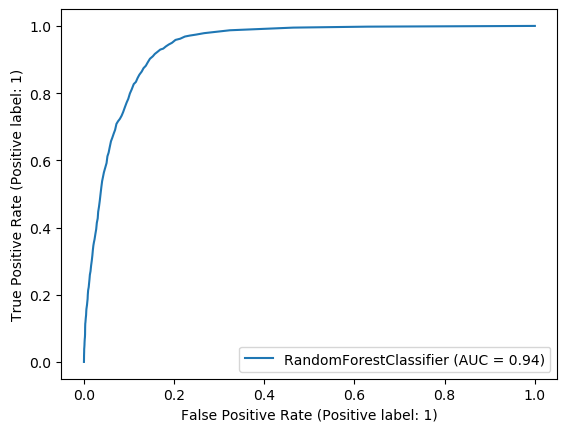

In [22]:
# 7-creation of roc_acu
create_roc_auc_plot(model, X_test, y_test)

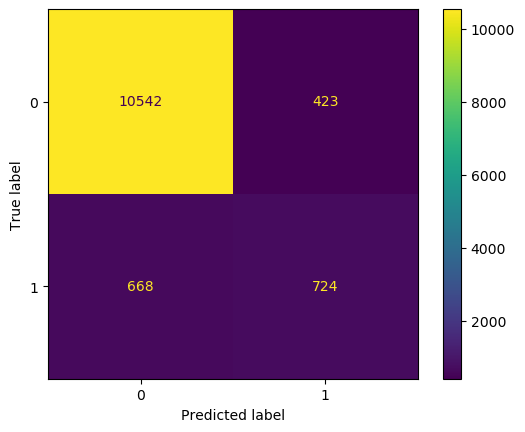

In [23]:
# 8-creation of confusion matrix
create_confusion_matrix_plot(model, X_test, y_test)

## MLflow Section

### MLflow experiment creation

In [24]:
## basic classifier
experiment_name = "basic_classifier"
run_name="term_deposit"
run_metrics = get_metrics(y_test, y_pred)
print(run_metrics)

{'accuracy': 0.91, 'precision': 0.63, 'recall': 0.52}


In [25]:
def create_experiment(experiment_name,run_name, run_metrics,model, confusion_matrix_path = None, 
                      roc_auc_plot_path = None, run_params=None):
    
    '''
    Function to create an experiment in MLFlow and log parameters, metrics and artifacts files like images
    '''
    
    import mlflow
    mlflow.set_experiment(experiment_name)
    
    with mlflow.start_run():
        
        if not run_params == None:
            for param in run_params:
                mlflow.log_param(param, run_params[param])
            
        for metric in run_metrics:
            mlflow.log_metric(metric, run_metrics[metric])
        
        mlflow.sklearn.log_model(model, "model")
        
        if not confusion_matrix_path == None:
            mlflow.log_artifact(confusion_matrix_path, 'confusion_materix')
            
        if not roc_auc_plot_path == None:
            mlflow.log_artifact(roc_auc_plot_path, "roc_auc_plot")
        
            
    print(f'Run - {run_name} is logged to Experiment - {experiment_name}' )

In [26]:
create_experiment(experiment_name,run_name,run_metrics,model,'confusion_matrix.png', 'roc_auc_curve.png')

2023/03/22 20:31:28 WARNING mlflow.utils.requirements_utils: Found lz4 version (3.1.3+dfsg) contains a local version label (+dfsg). MLflow logged a pip requirement for this package as 'lz4==3.1.3' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Run - term_deposit is logged to Experiment - basic_classifier


In [27]:
## optimized model

experiment_name = "optimized model"
run_name="Random_Search_CV_Tuned_Model"
model_tuned,best_params = hyper_parameter_tuning(X_train, y_train)
run_params = best_params

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Random grid:  {'n_estimators': [5, 10, 50, 100], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 6, 8], 'min_samples_leaf': [1, 3, 5]} 

Best Parameters:  {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'sqrt'}  



In [28]:
y_pred = predict_on_test_data(model_tuned,X_test) #will return the predicted class
run_metrics = get_metrics(y_test, y_pred)
print(run_metrics)

{'accuracy': 0.91, 'precision': 0.62, 'recall': 0.53}


In [29]:
create_experiment(experiment_name,run_name,run_metrics,model_tuned,'confusion_matrix.png', 'roc_auc_curve.png',run_params)

2023/03/22 20:35:39 WARNING mlflow.utils.requirements_utils: Found lz4 version (3.1.3+dfsg) contains a local version label (+dfsg). MLflow logged a pip requirement for this package as 'lz4==3.1.3' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Run - Random_Search_CV_Tuned_Model is logged to Experiment - optimized model


### creating experiment and register model